In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os

import perturbseq as perturb

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [2]:
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000
pref=SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.1000cells.analysis'

FIGS=DATA+'/2020-09-15_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2020-09-15_Figures/


In [5]:
adata=sc.read(SUBSAMPLED+'.channel_1to32.counts_per_cell'+str(counts)+'.analysis.regress_out_vbc.h5ad',cache=False)
adata

Only considering the two last: ['.regress_out_vbc', '.h5ad'].
Only considering the two last: ['.regress_out_vbc', '.h5ad'].


AnnData object with n_obs × n_vars = 150044 × 1145 
    obs: 'KRAS_A146P', 'KRAS_A146T', 'KRAS_A146V', 'KRAS_A59E', 'KRAS_A59G', 'KRAS_A59T', 'KRAS_AG11TD', 'KRAS_AG59GV', 'KRAS_C118S', 'KRAS_D119G', 'KRAS_D33E', 'KRAS_D57N', 'KRAS_E31K', 'KRAS_E63K-', 'KRAS_G12A', 'KRAS_G12C', 'KRAS_G12D', 'KRAS_G12F', 'KRAS_G12I', 'KRAS_G12R', 'KRAS_G12S', 'KRAS_G12V', 'KRAS_G12Y', 'KRAS_G13C', 'KRAS_G13E', 'KRAS_G13R', 'KRAS_G13V', 'KRAS_G60D', 'KRAS_G60S', 'KRAS_G60V', 'KRAS_H166Y', 'KRAS_I163S', 'KRAS_I36M', 'KRAS_K117N', 'KRAS_K117R', 'KRAS_K147N', 'KRAS_K147T', 'KRAS_K176Q', 'KRAS_K5E', 'KRAS_L159S', 'KRAS_L19F', 'KRAS_L52F', 'KRAS_L79I', 'KRAS_M111L', 'KRAS_N26Y', 'KRAS_P110S', 'KRAS_P34L', 'KRAS_P34R', 'KRAS_Q22H', 'KRAS_Q22K', 'KRAS_Q25H', 'KRAS_Q61A', 'KRAS_Q61H', 'KRAS_Q61K', 'KRAS_Q61L', 'KRAS_Q61P', 'KRAS_Q61R', 'KRAS_Q99E', 'KRAS_R135T', 'KRAS_R149K', 'KRAS_R164Q', 'KRAS_R41K', 'KRAS_R68S', 'KRAS_T144P', 'KRAS_T158A', 'KRAS_T20M', 'KRAS_T20R', 'KRAS_T50I', 'KRAS_T50P', 'KRAS_T58I', 'KRAS

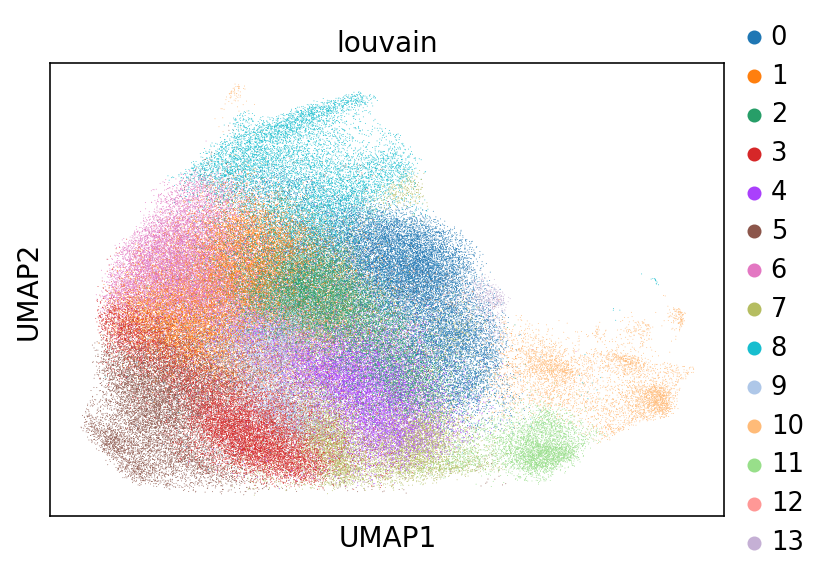

In [6]:
sc.pl.umap(adata,color=['louvain'])

In [7]:
perturb.tl.enriched_features(adata,f1='louvain',f2='mut.std',fdr=0.05,
                      copy=False,add_min_pval=True,pval_correction='fdr_bh',ps=1e-10)

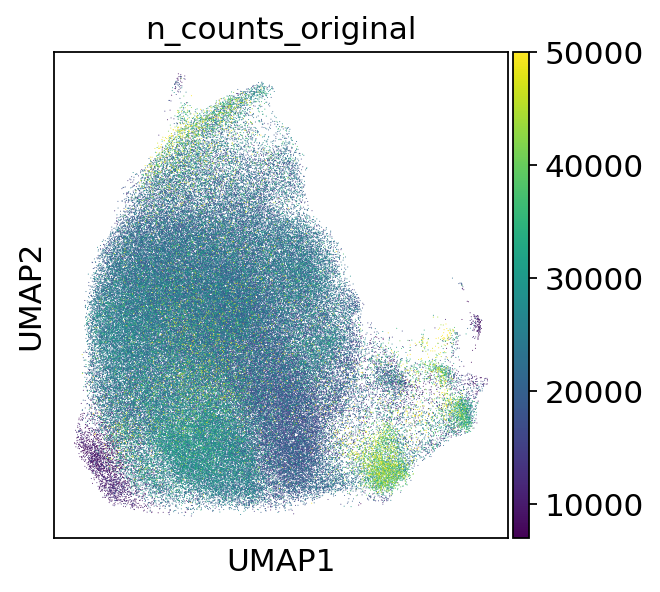

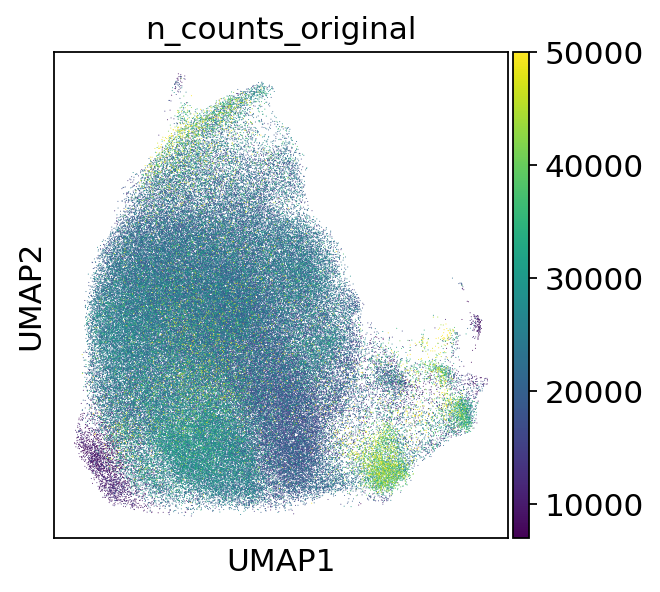

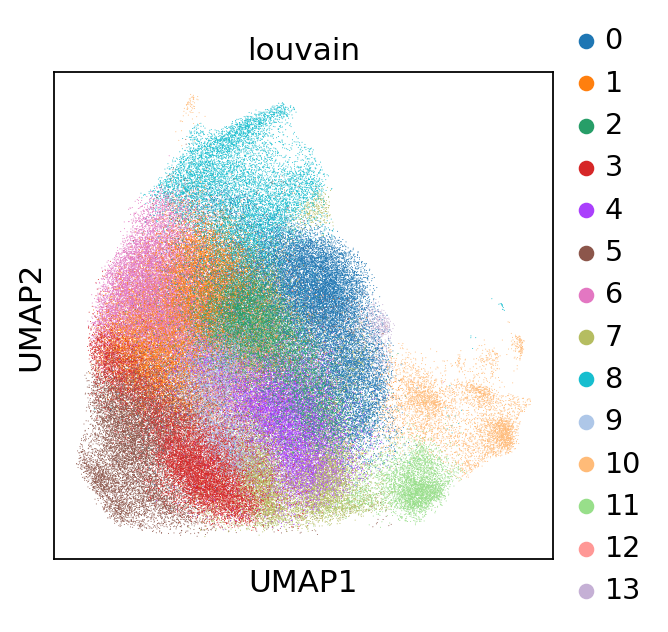

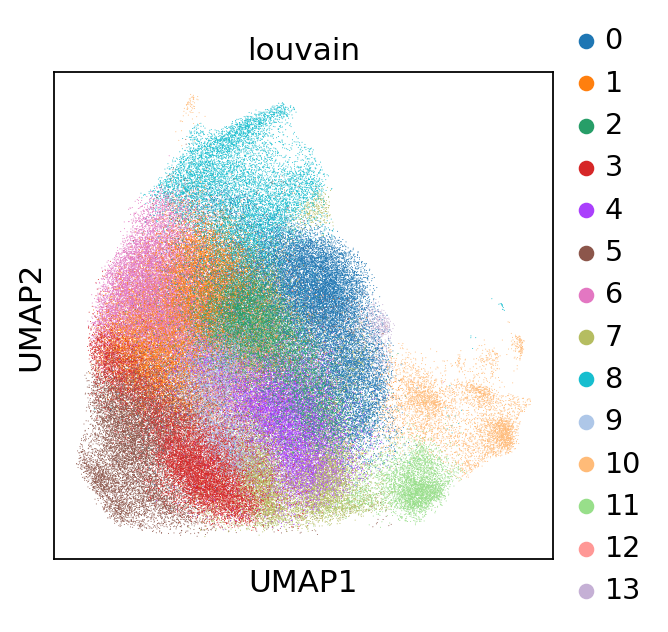

In [8]:
sc.set_figure_params(figsize=(4,4),dpi=80)
sc.pl.umap(adata,color=['n_counts_original'],vmax=50000,save='_'+PROTEIN+'_counts.pdf')
sc.pl.umap(adata,color=['n_counts_original'],vmax=50000,save='_'+PROTEIN+'_counts.png')
sc.pl.umap(adata,color=['louvain'],save='_'+PROTEIN+'_louvain.pdf')
sc.pl.umap(adata,color=['louvain'],save='_'+PROTEIN+'_louvain.png')

In [9]:
adata.obs['louvain'].value_counts()

0     18896
1     16707
2     16273
3     15029
4     14333
5     13477
6     12893
7     10958
8      9861
9      8053
10     4924
11     4131
12     3699
13      810
Name: louvain, dtype: int64

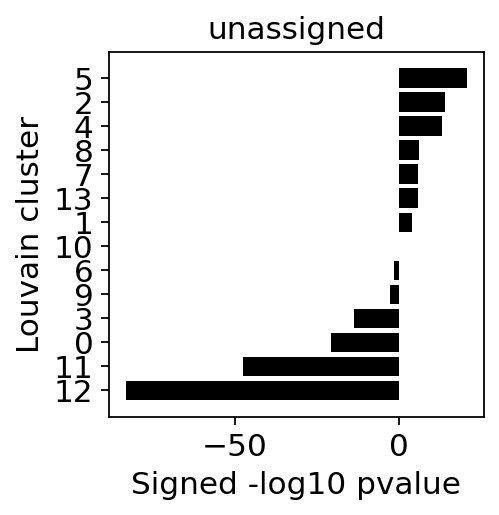

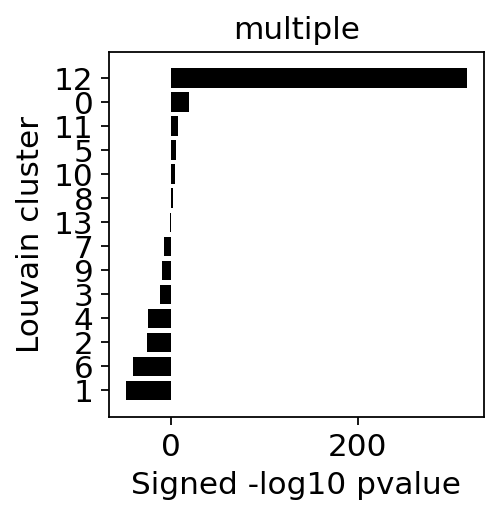

In [10]:
FDRlog=1
df=adata.uns['enrich_louvain_vs_mut.std.p_adj.negLog10.signed']

for entry in ['uninfected','multiple']:

    fig,plots=plt.subplots(1)
    fig.set_size_inches(3,3)
    df=df.sort_values(by=entry)
    df['color_'+entry]='lightgray'
    df.loc[np.abs(df[entry])>=FDRlog,'color_'+entry]='black'
    plots.barh(df.index,df[entry],color=df['color_'+entry])
    plots.set_xlabel('Signed -log10 pvalue')
    plots.set_ylabel('Louvain cluster')
    plots.grid(False)
    if entry=='uninfected':
        entry='unassigned'
    plots.set_title(entry)
    
    #plots.set_xlim(-10,10)
    plt.savefig(FIGS+'/'+PROTEIN+'.doublet_'+entry+'.pdf',bbox_inches = "tight") 
    plt.savefig(FIGS+'/'+PROTEIN+'.doublet_'+entry+'.png',bbox_inches = "tight")
    plt.show()

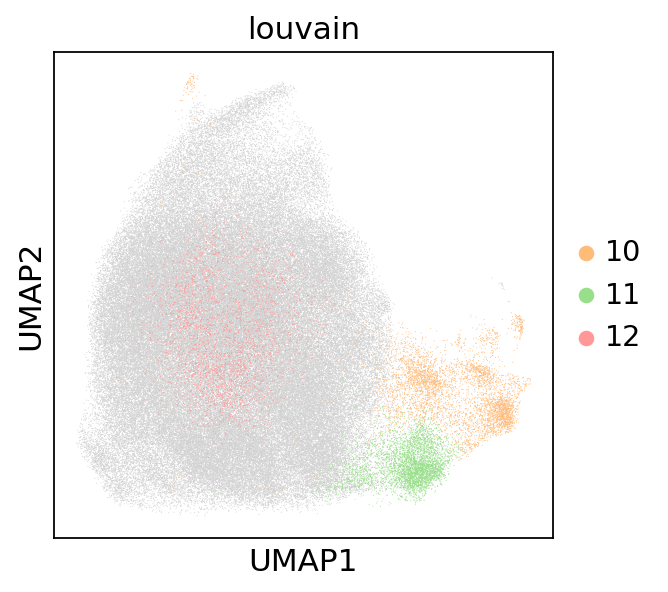

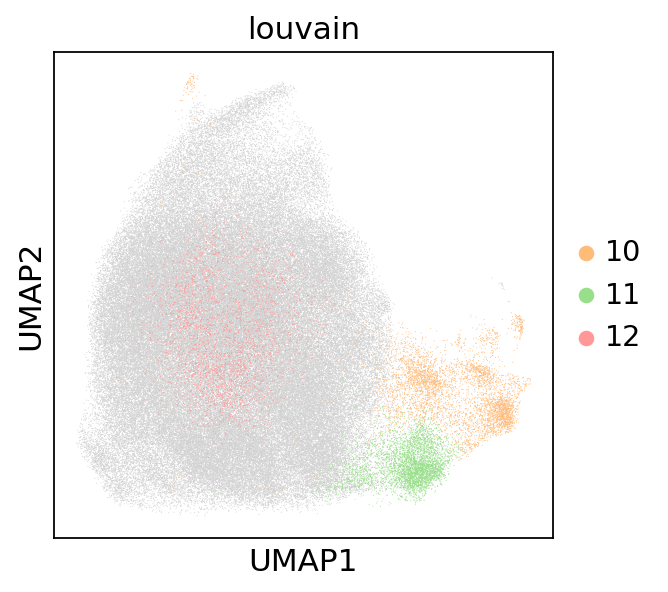

In [11]:
sc.pl.umap(adata,color=['louvain'],groups=['10','11','12'],save='_'+PROTEIN+'_doublet_subset.pdf')
sc.pl.umap(adata,color=['louvain'],groups=['10','11','12'],save='_'+PROTEIN+'_doublet_subset.png')

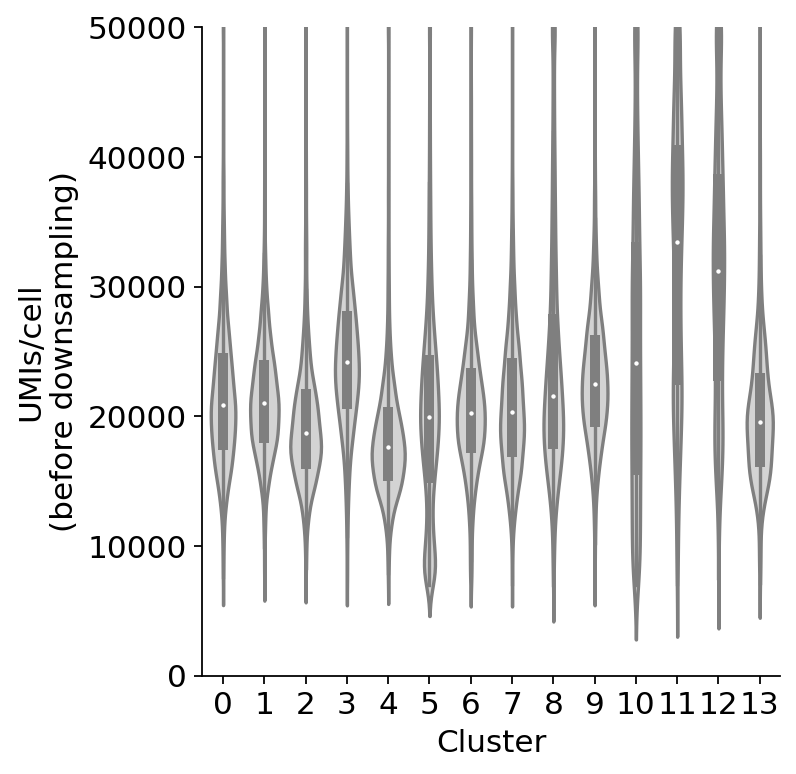

In [12]:
#the counts by cluster

sns.catplot(x='louvain',y='n_counts_original',data=adata.obs,kind='violin',
           height=5, # make the plot 5 units high
            aspect=1,
           color='lightgray')
plt.grid(False)
plt.xlabel('Cluster')
plt.ylabel('UMIs/cell\n(before downsampling)')
plt.ylim(0,50000)
plt.savefig(FIGS+'/'+PROTEIN+'.doublet_counts.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/'+PROTEIN+'.doublet_counts.png',bbox_inches = "tight")

In [13]:
counts=adata.obs['louvain'].value_counts()

In [16]:
(counts['10']+counts['11']+counts['12'])/adata.n_obs

0.08500173282503799

In [ ]:
FIGS